# hw04
# kwon_hyunku

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Exercise 1

In [2]:
# parameter

inc0 = 80000 #base income
sd = 0.1 #standard deviation
per = 0.2 #persistance
gr = 0.03 #growth rate

begin_year = int(2019) #beginning year
life_years = 40 #lifetime working years
num_draws = 10000 #number of simulations

inc_matrix = (life_years, num_draws) 
ln_inc = np.zeros(inc_matrix) #empty matrix (40 by 10000)

# error term

np.random.seed(524)
norm_errors = np.random.normal (0, sd, inc_matrix) # normal distribution of errors

# 2019 income

ln_inc[0, :] = np.log(inc0) + norm_errors[0,:]

# following years

for yr in range(1,40):
    ln_inc[yr,:] = (1 - per)*(np.log(inc0) + gr*yr) + per*ln_inc[yr-1,:] + norm_errors[yr, :]


inc = np.exp(ln_inc)


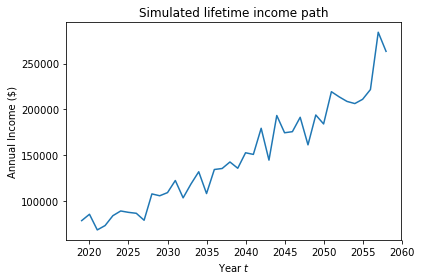

In [3]:
x = range(begin_year, (begin_year+life_years))
y = inc[:,10] #chose a random draw

%matplotlib inline

plt.plot(x,y)
plt.xlabel('Year $t$')
plt.ylabel('Annual Income ($)')
plt.title('Simulated lifetime income path')

# Exersise 2: histogram

The simulated income, in general, looks normally distributed.


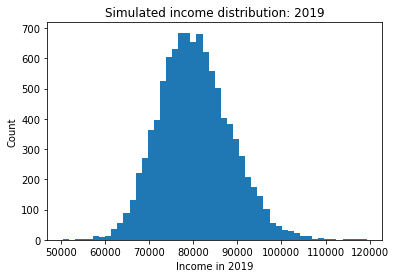

In [4]:
#income distribution in 2019

start_income = inc[0,:]

%matplotlib inline

plt.hist(inc[0,:], bins=50)
plt.xlabel('Income in 2019')
plt.ylabel('Count')
plt.title('Simulated income distribution: 2019')

print ('The simulated income, in general, looks normally distributed.')

In [5]:
inc2019 = inc[0,:]
inc_100k = sum(inc2019>100000)/len(inc2019)
inc_70k = sum(inc2019<70000)/len(inc2019)

print('Percent of students whose first income is more than 100,000 =', inc_100k*100, '%')
print('Percent of students whose first income is less than 70,000 =', inc_70k*100, '%')

Percent of students whose first income is more than 100,000 = 1.27 %
Percent of students whose first income is less than 70,000 = 9.02 %


# Exercise 3: Student Loan Reimbursement (1)

In [6]:
#student loan
ln = 95000
payoff = []
pay = list(zip(*inc*0.1))

for i in range(len(pay)):
    for j in range(len(pay[i])):
        a = np.cumsum(pay[i][:j + 1])
        if a[j] > ln:
            payoff.append(j + 1)
            break

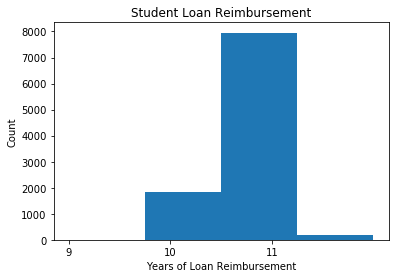

In [7]:
#histogram

%matplotlib inline

plt.hist(payoff, bins = len(set(payoff)))
plt.xticks(np.arange(min(payoff),max(payoff)))
plt.xlabel('Years of Loan Reimbursement')
plt.ylabel('Count')
plt.title('Student Loan Reimbursement')

In [8]:
payoff_in_10yrs = sum(i <= 10 for i in payoff)/len(payoff)

print('Percent of Students who pay off the loan in 10 years =', payoff_in_10yrs*100, '%')

Percent of Students who pay off the loan in 10 years = 18.47 %


# Exercise 4: Student Loan Reimbursement (2)

In [9]:
inc0_2 = 85000
sd_2 = 0.15
ln_inc_2 = np.zeros(inc_matrix)

norm_errors_2 = np.random.normal(0, sd_2, inc_matrix)

ln_inc_2[0,:] = np.log(inc0_2) + norm_errors_2[0,:]

for yr in range (1,40):
    ln_inc_2[yr,:] = (1-per)*(np.log(inc0_2) + gr*yr)+per*ln_inc_2[yr-1,:] + norm_errors_2[yr,:]
    
inc_2=np.exp(ln_inc_2)

payoff_2 = []
pay_2 = list(zip(*inc_2*0.1))

for i in range(len(pay_2)):
    for j in range(len(pay_2[i])):
        a = np.cumsum(pay_2[i][:j+1])
        if a[j]>ln:
            payoff_2.append(j+1)
            break

Percentage of students who pay off the loan in 10 years = 70.77 %


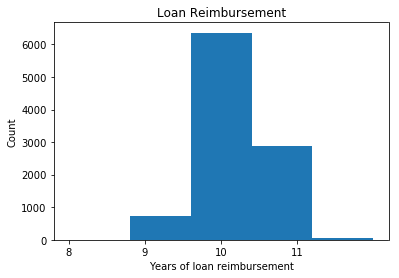

In [10]:
plt.hist(payoff_2, bins=len(set(payoff_2)))
plt.xticks(np.arange(min(payoff_2),max(payoff_2)))
plt.xlabel('Years of loan reimbursement')
plt.ylabel('Count')
plt.title('Loan Reimbursement')

payoff_10yrs_2 = sum(i <= 10 for i in payoff_2)/len(payoff_2)

print('Percentage of students who pay off the loan in 10 years =', payoff_10yrs_2*100, '%')